In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('ggplot')

# Data Visualization

Tables are powerful way to organize and interpret data. However, human brain is good in recognizing patterns in images/graphs than looking into raw data such as numbers and strings. 

In this section, we will learn different ways of data visualization. In data visualization, we convert our data in a systematic and logical way into the visual elements that make up the final graphic. Excellent plots directly helps in making decisions. However, good visualization is not an easy task. 

Goals of Data Visualization
- to help your own understanding about data
- to communicate or convey results

Let's consider the California housing dataset. The data contains information from the 1990 California census. This data has metrics such as population, median income etc (as shown below) for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes the data, and each block typically has a population of 600 to 3000 people.

-  **longitude**: A measure of how far west a house is; a higher value is farther west
- **latitude**: A measure of how far north a house is; a higher value is farther north
- **housing_median_age**: Median age of a house within a block; a lower number is a newer building
- **total_rooms**: Total number of rooms within a block
- **total_bedrooms**: Total number of bedrooms within a block
- **population**: Total number of people residing within a block
- **households**: Total number of households, a group of people residing within a home unit, for a block
- **median_income**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- **median_house_value**: Median house value for households within a block (measured in US Dollars)
- **ocean_proximity**: Location of the house w.r.t ocean/sea

## Types of Data

Categorical data and numerical data are two broad types of data used in statistics and data analysis. They differ in the way they represent information.

### Categorical Data
Categorical data, also known as qualitative data, refers to data that can be grouped into categories but cannot be measured numerically. These data points represent characteristics or labels.

**Characteristics**:
- Non-numeric (but can sometimes be represented by numbers for coding purposes)
- Discrete categories
- Can be nominal or ordinal

#### Types of Categorical Data:
- **Nominal Data**: No inherent order or ranking.
Examples: Gender (male, female), Eye color (blue, green, brown), Car brands (Toyota, Ford, Honda).
- **Ordinal Data**: Has a clear order or ranking, but the intervals between values are not meaningful.
Examples: Education level (High school, Bachelor’s, Master’s), Satisfaction level (unsatisfied, neutral, satisfied).

### Numerical Data
Numerical data, also known as quantitative data, refers to data that represent numbers and can be measured or counted. These data points represent quantities and can be manipulated mathematically.

**Characteristics**:
- Numeric values
- Can be discrete or continuous

#### Types of Numerical Data:
- **Discrete Data**: Consists of distinct, separate values (often counts of things).
Examples: Number of students in a class, Number of cars in a parking lot.
- **Continuous Data**: Can take any value within a given range, often measurements.
Examples: Height, weight, temperature, time.


Understanding the distinction between categorical and numerical data is important when analyzing data because it determines what kinds of visualizations are appropriate for each data type.

### How to tell stories through data? 

1. Understand the context (problem statement)
2. Choose an appropriate visual display
3. Eliminate clutter
4. Focus attention where you want it
5. Think like a designer
6. Tell a story

For eg: 

<div style="text-align:center"><img src="pics/viz-2.png" width=700/></div>

-------------------------------


<div style="text-align:center"><img src="pics/viz-3.png" width=700/></div>
-----------------------

Pic Credits: Nussbaumer Knaflic, C. (2015). Storytelling with data (C. N. Knaflic, Ed.). John Wiley & Sons.

#### Bad examples of Data Visualization

<div style="text-align:center"><img src="pics/viz-1.png" width=1000/></div>

## Scatter Plots

Scatter plots can be used to show the relationship between two (or more) numerical columns. 

For eg: Let's see all the blocks that were considered for the 1990 census by plotting the longitude and latitude numbers. 

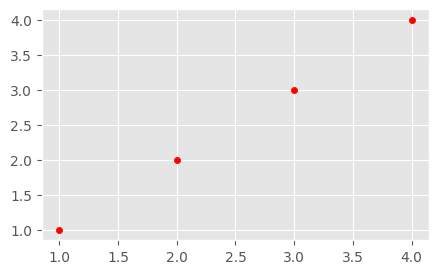

In [3]:
plt.figure(figsize=(5, 3))
x = np.arange(1, 5)
y = np.arange(1, 5)
colors = np.array(['blue', 'blue', 'red', 'blue'])
plt.scatter(x, y, c='red', s=20)
plt.show()

In [4]:
housing = pd.read_csv('data/housing.csv')
housing = housing.dropna()
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


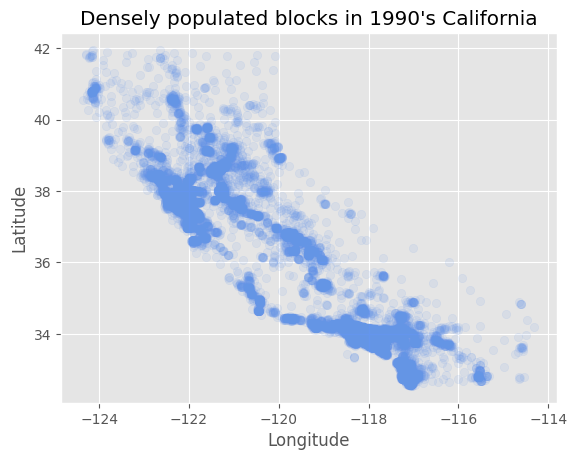

In [5]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.1, c='cornflowerblue')
plt.title("Densely populated blocks in 1990's California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Representing more features on scatter plots 

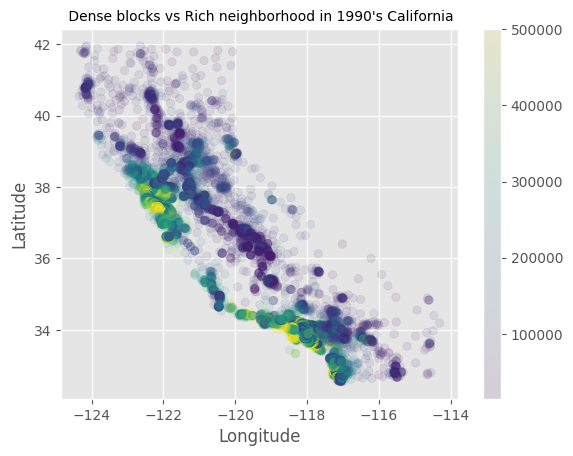

In [6]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.1, 
            c=housing['median_house_value'], cmap='viridis')
plt.colorbar()
plt.title(" Dense blocks vs Rich neighborhood in 1990's California", fontsize=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

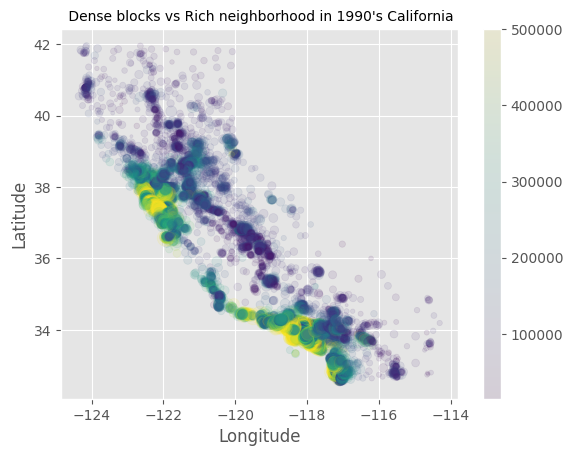

In [7]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.1, c=housing['median_house_value'], cmap='viridis',
            s=housing['median_income']*10)
plt.colorbar()
plt.title(" Dense blocks vs Rich neighborhood in 1990's California", fontsize=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Problem with Scatterplots

- Overplotting

## Visualizing Blue Jays bird dataset

In [8]:
blue_jays = pd.read_csv('data/blue_jays.csv')
blue_jays.head(3)

,bird_id,sex,bill_depth_mm,bill_width_mm,bill_length_mm,head_length_mm,body_mass_g,skull_size_mm
0,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66
1,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38
2,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25


### Compare between the head_length and body_mass of the blue jay birds based on sex

In [9]:
male_birds = blue_jays.query('sex == "M"')
female_birds = blue_jays.query('sex == "F"')

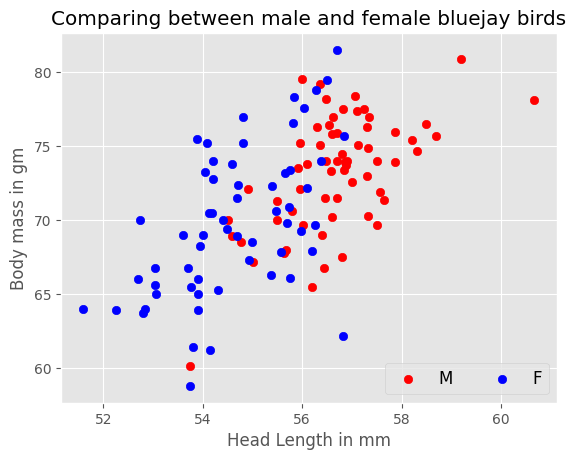

In [10]:
plt.scatter(male_birds['head_length_mm'], male_birds['body_mass_g'], c='red', label='M')
plt.scatter(female_birds['head_length_mm'], female_birds['body_mass_g'], c='blue', label='F')
plt.xlabel('Head Length in mm')
plt.ylabel('Body mass in gm')
plt.title("Comparing between male and female bluejay birds")
plt.legend(ncols=2, bbox_to_anchor=(1, 0), loc='lower right', fontsize='large')
plt.show()

### Compare between the head_length and body_mass of the blue jay birds based on sex

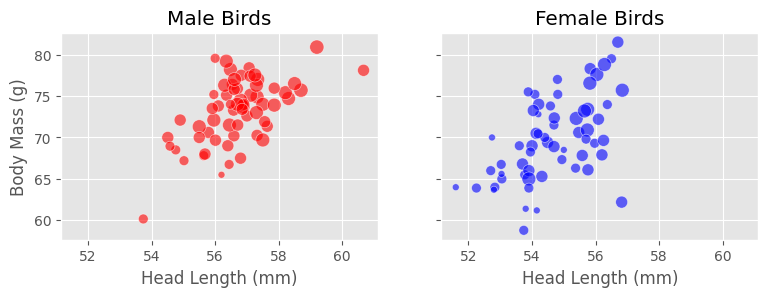

In [11]:
# Example dot size mapping
dot_size = {29: 25, 30: 50, 31: 75, 32: 100, 33: 105}

# Safe mapping function with fallback for missing keys
def skull_size(size):
    rounded = round(size)
    return dot_size.get(rounded, 25)  # Fallback to 25 if not found

# Add dot size to DataFrame (generic function)
def add_skull_dot_size(df):
    df = df.copy()
    df['skull_dot_size'] = df['skull_size_mm'].map(skull_size)
    return df

# Apply to both male and female birds
male_birds = add_skull_dot_size(male_birds)
female_birds = add_skull_dot_size(female_birds)

# Example my_scatter function (you should replace with your real one)
def my_scatter(ax, data, size_col, color):
    ax.scatter(
        data['head_length_mm'], 
        data['body_mass_g'], 
        s=data[size_col], 
        c=color, 
        alpha=0.6, 
        edgecolors='w'
    )

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3), sharey=True, sharex=True)
fig.subplots_adjust(top=0.8)

my_scatter(axs[0], male_birds, 'skull_dot_size', 'red')
my_scatter(axs[1], female_birds, 'skull_dot_size', 'blue')

axs[0].set_title('Male Birds')
axs[1].set_title('Female Birds')
axs[0].set_xlabel('Head Length (mm)')
axs[1].set_xlabel('Head Length (mm)')
axs[0].set_ylabel('Body Mass (g)')

plt.show()

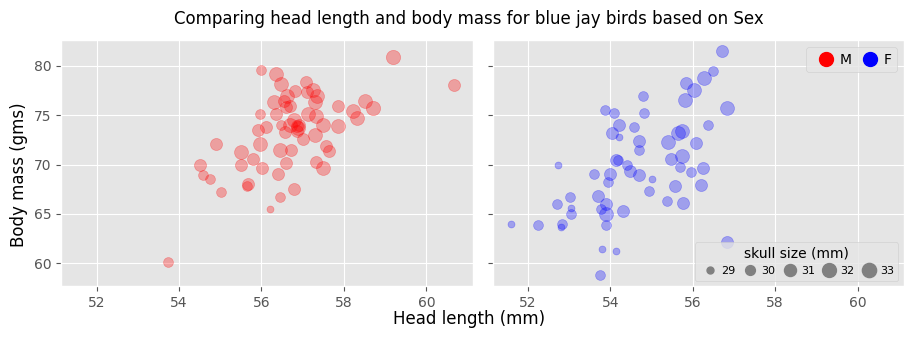

In [12]:
dot_size = {29: 25, 30: 50, 31: 75, 32: 100, 33: 105}

def skull_size(size):
    return dot_size[round(size)]


male_birds = blue_jays.query('sex == "M"')
female_birds = blue_jays.query('sex == "F"')

skull_dot_size = pd.DataFrame({'skull_dot_size': male_birds['skull_size_mm'].map(skull_size)})
male_birds = pd.concat([male_birds, skull_dot_size], axis=1)

skull_dot_size = pd.DataFrame({'skull_dot_size': female_birds['skull_size_mm'].map(skull_size)})
female_birds = pd.concat([female_birds, skull_dot_size], axis=1)



def my_scatter(ax, df, col_name, color):
    for dot_size, group in df.groupby(col_name, as_index=False):
        ax.scatter(group['head_length_mm'], group['body_mass_g'], c=color, s=dot_size, alpha=0.3)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3), sharey=True, sharex=True)
fig.subplots_adjust(top=0.8)

my_scatter(axs[0], male_birds[['skull_dot_size', 'head_length_mm', 'body_mass_g']], 'skull_dot_size', 'red')
my_scatter(axs[1], female_birds[['skull_dot_size', 'head_length_mm', 'body_mass_g']], 'skull_dot_size', 'blue')



colors = ["red", "blue"]
texts = ["M", "F"]
patches1 = [plt.plot([],[], marker="o", ms=10, ls="", color=colors[i], 
            label="{}".format(texts[i]) )[0]  for i in range(len(texts)) ]
patches2 = [plt.plot([],[], marker="o", ms=math.sqrt(dot_size[i]), ls="", color="grey", 
            label="{}".format(i) )[0]  for i in dot_size.keys() ]
legend2 = plt.legend(handles=patches2, loc='lower right',ncol=5, facecolor=None, numpoints=1, columnspacing=0.3, handletextpad=0, title="skull size (mm)", fontsize=8)
plt.legend(handles=patches1, loc='upper right', ncol=2, facecolor=None, numpoints=1, columnspacing=0.3, handletextpad=0)
plt.gca().add_artist(legend2)
plt.tight_layout()
fig.suptitle("Comparing head length and body mass for blue jay birds based on Sex", y=1.05)
fig.supylabel("Body mass (gms)", x=-0.01)
fig.supxlabel("Head length (mm)", y=-0.01)
plt.show()

In [13]:
blue_jays.columns

Index(['bird_id', 'sex', 'bill_depth_mm', 'bill_width_mm', 'bill_length_mm',
       'head_length_mm', 'body_mass_g', 'skull_size_mm'],
      dtype='object')

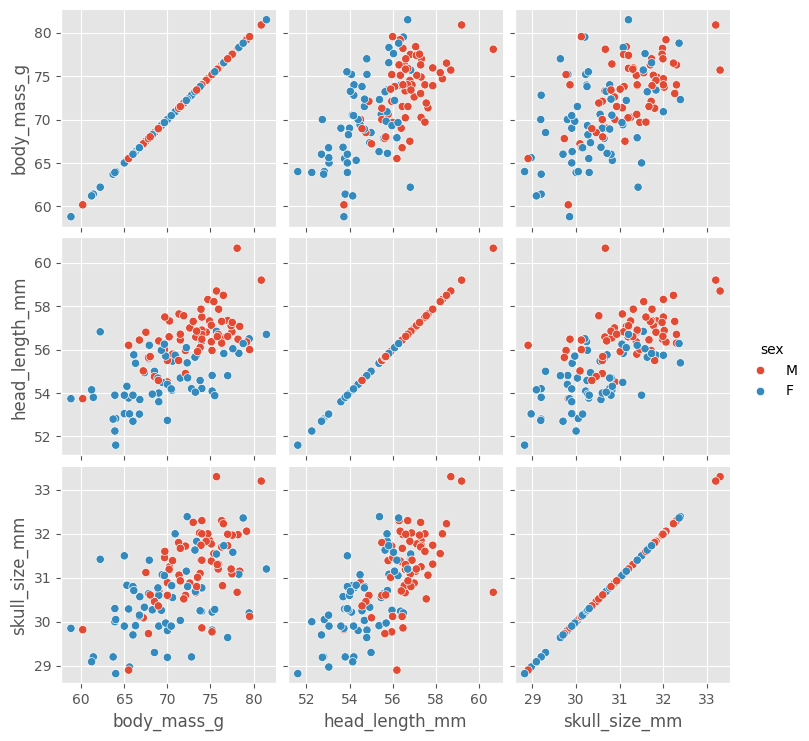

In [14]:
import seaborn as sns


sns.pairplot(blue_jays[['body_mass_g', 'head_length_mm', 'skull_size_mm', 'sex']], kind='scatter', hue='sex', diag_kind=None)

By looking at the figure above, we can compare between body mass, head length and skull size and conclude that the skull size of females is somewhat towards the lower side than males, however, when it comes to head length, there is a clear separation. The male head length is bigger than the female birds, this is because male bill length is higher than the females. 

### Some more examples
|     | |
| ------- | ------------| 
| <img src="pics/badpic1.webp" width=300/> | <img src="pics/badpic2.png" width=300/> |
| <img src="pics/badpic6.jpg" width=300/> | <img src="pics/badpic7.webp" width=300/> |

 </p>

A better representation would be to display them as a scatter plot matrix as shown below:

## Line plots

When the x axis represents time or a strictly increasing quantity such as temp on a sunny day, we commonly draw line graphs. 

In [15]:
top_movies_2017 = pd.read_csv('data/top_movies_2017.csv')
top_movies_2017 = top_movies_2017.sample(top_movies_2017.shape[0]) # Shuffling the rows of the dataframe
top_movies_2017.head(3)

,Title,Studio,Gross,Gross (Adjusted),Year
48,Around the World in 80 Days,United Artists,42000000,574430800,1956
144,2001: A Space Odyssey,MGM,56954992,385261600,1968
150,Kramer Vs. Kramer,Columbia,106260000,382450000,1979


In [16]:
top_movies_2017['Title'].count()

np.int64(200)

In [17]:
def find_decade(year):
    return (year // 10) * 10

In [18]:
movies_by_decade = pd.DataFrame({'Title': top_movies_2017['Title'],
                                'Decade': top_movies_2017['Year'].map(find_decade)})
movies_by_decade.head()

,Title,Decade
48,Around the World in 80 Days,1950
144,2001: A Space Odyssey,1960
150,Kramer Vs. Kramer,1970
63,Star Wars: Episode III - Revenge of the Sith,2000
181,Apollo 13,1990


In [19]:
grouped = movies_by_decade.groupby('Decade', as_index=False)
df = grouped.count() 
df.head()

,Decade,Title
0,1920,1
1,1930,2
2,1940,7
3,1950,13
4,1960,19


In [20]:
df

,Decade,Title
0,1920,1
1,1930,2
2,1940,7
3,1950,13
4,1960,19
5,1970,26
6,1980,25
7,1990,32
8,2000,42
9,2010,33


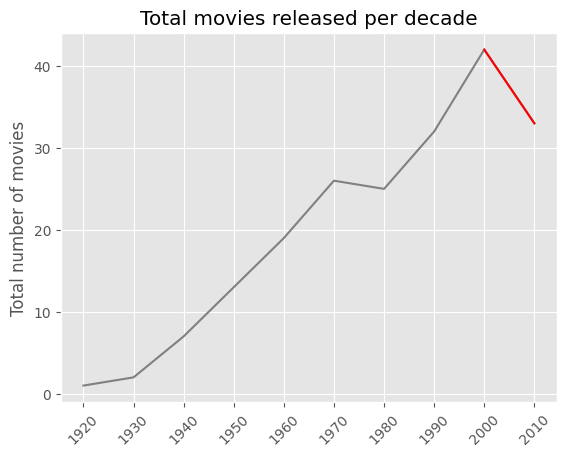

In [22]:
plt.plot(df['Decade'], df['Title'], color='grey')
plt.title("Total movies released per decade")
plt.ylabel('Total number of movies')
plt.gca().set_xlabel(None)
plt.xticks(np.arange(1920, 2011, 10), rotation=45)
plt.plot([2000, 2010], [42, 33], color='red')
plt.show()

### Categorical Distribution

A distribution, in general, means how data are spread or distributed within a range or a set. 

Categorical Distribution is where we want to measure the distributions of categorical data. 
For eg: how many students are enrolled in different sections of a course, how many cars are in the inventory of a car dealership. 

Visualizing Categorical Distribution

In order to visualize the categorical distribution, we use bar plot. 

Lets visualize the gross income of the first 10 rows of the dataset. 

In [23]:
top_movies_2017.head(3)

,Title,Studio,Gross,Gross (Adjusted),Year
48,Around the World in 80 Days,United Artists,42000000,574430800,1956
144,2001: A Space Odyssey,MGM,56954992,385261600,1968
150,Kramer Vs. Kramer,Columbia,106260000,382450000,1979


In [24]:
first_10 = top_movies_2017.iloc[:10]
first_10

,Title,Studio,Gross,Gross (Adjusted),Year
48,Around the World in 80 Days,United Artists,42000000,574430800,1956
144,2001: A Space Odyssey,MGM,56954992,385261600,1968
150,Kramer Vs. Kramer,Columbia,106260000,382450000,1979
63,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,527395500,2005
181,Apollo 13,Universal,173837933,354335300,1995
193,The Twilight Saga: New Moon,Sum.,296623634,345910600,2009
55,The Towering Inferno,Fox,116000000,545629600,1974
27,Grease,Paramount,188755690,684256200,1978
81,The Poseidon Adventure,Fox,84563118,488078400,1972
109,Iron Man 3,Buena Vista,409013994,433906300,2013


In [25]:
def convert_to_millions(gross):
    return np.round(gross/1e6)

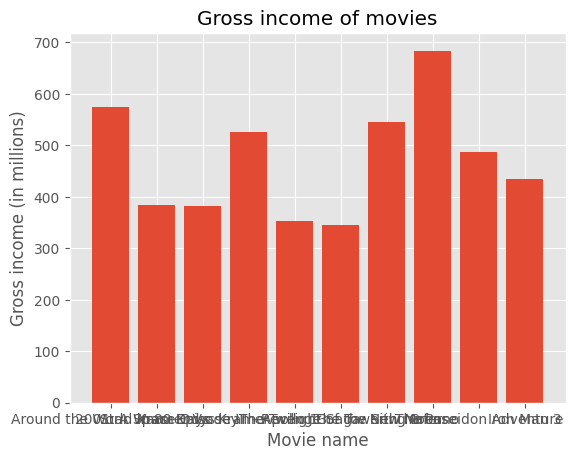

In [26]:
plt.bar(first_10['Title'], first_10['Gross (Adjusted)'].map(convert_to_millions))
plt.ylabel('Gross income (in millions)')
plt.xlabel('Movie name')
plt.title("Gross income of movies")
plt.show()

**Task**: Can you identify some of the problems in the above figure? 

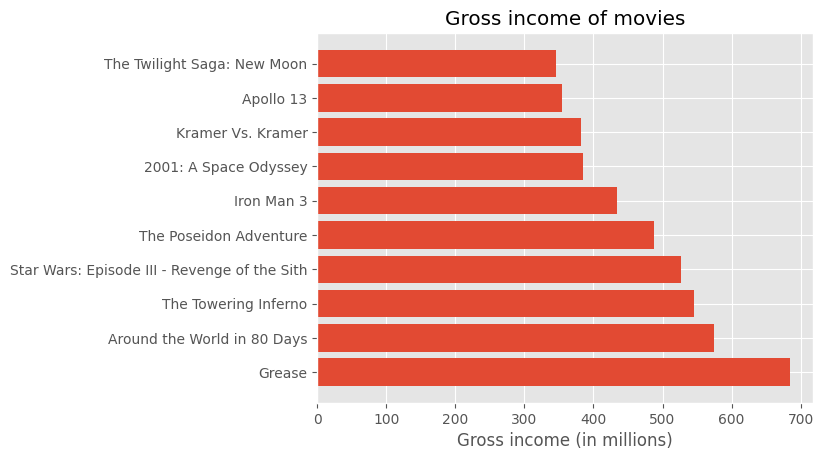

In [27]:
first_10 = first_10.sort_values('Gross (Adjusted)', axis=0, ascending=False)
plt.barh(first_10['Title'], first_10['Gross (Adjusted)'].map(convert_to_millions))
plt.xlabel('Gross income (in millions)')
plt.title("Gross income of movies")
plt.show()

If you have lots of bars in your plot, then it is good idea to replace the bars with dots, to minimize clutter. 

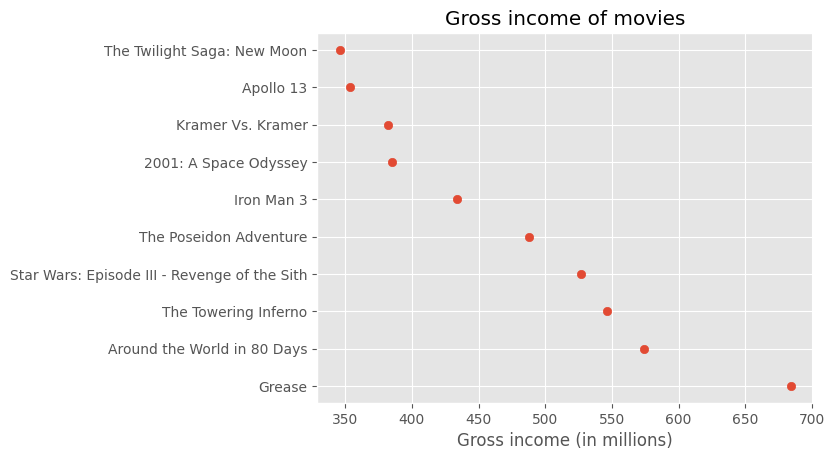

In [28]:
first_10 = first_10.sort_values('Gross (Adjusted)', axis=0, ascending=False)
plt.scatter(first_10['Gross (Adjusted)'].map(convert_to_millions),first_10['Title'])
plt.xlabel('Gross income (in millions)')
plt.title("Gross income of movies")
plt.show()

Let's consider another dataset, titanic dataset. 

The information about the dataset can be found here: [Titanic dataset](https://www.kaggle.com/c/titanic/data)

In [29]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Question 1:

Write a python code to visualize the total number of male and female passengers survived on the titanic ship. 

In [30]:
maleAlive = titanic.query("Sex == 'male' and Survived == 1")
femaleAlive = titanic.query("Sex == 'female' and Survived == 1")

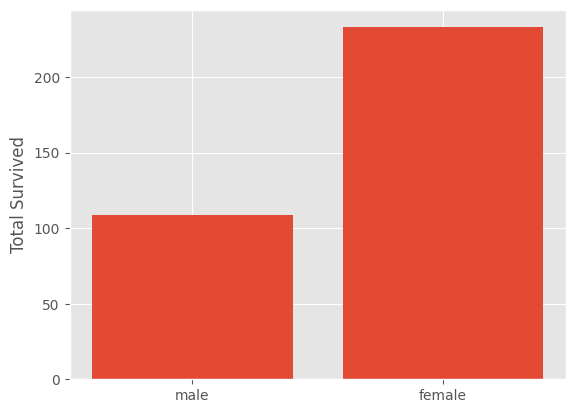

In [31]:
x = np.array(['male', 'female'])
y = np.array([maleAlive.shape[0], femaleAlive.shape[0]])
plt.bar(x, y)
plt.ylabel("Total Survived")
plt.show()

### A better visualization of the above figure would be the following: 

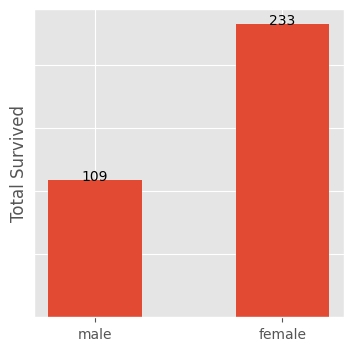

In [32]:
plt.figure(figsize=(4, 4))

x = np.array(['male', 'female'])
x_pos = [0, 0.2]
y = np.array([maleAlive.shape[0], femaleAlive.shape[0]])

plt.bar(x_pos, y, width=0.1)
plt.ylabel("Total Survived")
plt.xticks(x_pos, x)
plt.tick_params(labelleft=False, left=False)
plt.text(x_pos[0], y[0], str(y[0]), horizontalalignment="center")
plt.text(x_pos[1], y[1], str(y[1]), horizontalalignment="center")
plt.show()

**Task**: Looking into the figure above, can I conclude that the survival rate of male is higher than the female? In other words, if you are female, are you more likely to survive? 

When categories have different total values, then we should use proportions over amounts in bar plot to compare between the categories. 
For eg: the total number of males and females on the ship are different, therefore, when comparing between the survival rate of male vs female, we should compare the proportions of male and proportions of female survived in each group. 

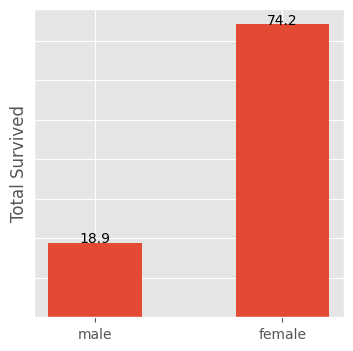

In [33]:
plt.figure(figsize=(4, 4))

x = np.array(['male', 'female'])
x_pos = [0, 0.2]
y = np.array([maleAlive.shape[0], femaleAlive.shape[0]])
male = titanic.query("Sex == 'male'")
female = titanic.query("Sex == 'female'")
y_prop = np.round((y / np.array([male.shape[0], female.shape[0]])) * 100, 1)

plt.bar(x_pos, y_prop, width=0.1)
plt.ylabel("Total Survived")
plt.xticks(x_pos, x)
plt.tick_params(labelleft=False, left=False)
plt.text(x_pos[0], y_prop[0], str(y_prop[0]), horizontalalignment="center")
plt.text(x_pos[1], y_prop[1], str(y_prop[1]), horizontalalignment="center")
plt.show()

### Grouped bars 

In [34]:
def age_group(age):
    if (age < 12):
        return "0-12"
    elif age < 24:
        return "12-23"
    elif age < 44:
        return "24-43"
    elif age < 64:
        return "44-63"
    else:
        return "64+"


In [35]:
alive = titanic.query("Survived == 1")
result = pd.pivot_table(data=alive, values='PassengerId', index='Sex', columns=alive['Age'].map(age_group), aggfunc='count')
result

Age,0-12,12-23,24-43,44-63,64+
Sex,,,,,
female,19,52,95,31,36
male,20,12,46,14,17


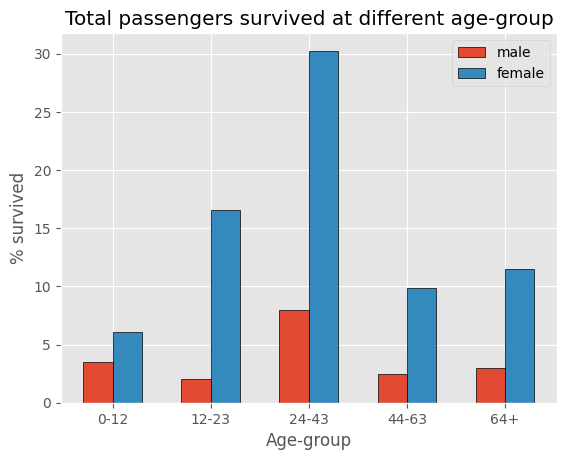

In [36]:
x_pos = np.arange(5)
plt.bar(x_pos-0.15, result.loc['male']/male.shape[0]*100, width=0.3, edgecolor='black', label='male')
plt.bar(x_pos+0.15, result.loc['female']/female.shape[0]*100, width=0.3, edgecolor='black', label='female')
plt.xticks(x_pos, result.columns)
plt.legend()
plt.title("Total passengers survived at different age-group")
plt.ylabel("% survived")
plt.xlabel("Age-group")
plt.show()

### Stacked bar 

In [37]:
result = pd.pivot_table(titanic, values='PassengerId', columns='Pclass', index='Sex', aggfunc='count')
result

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


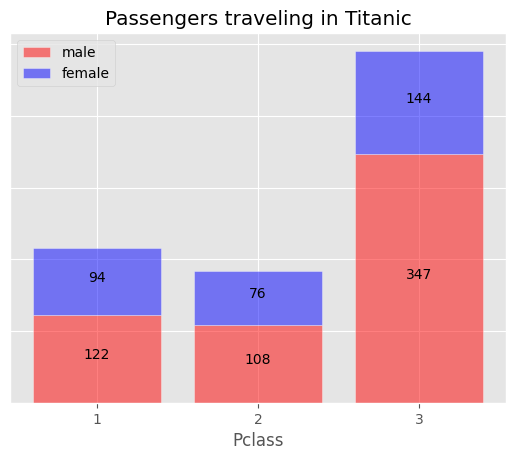

In [38]:
plt.bar(result.columns, result.loc['male'], color='red', alpha=0.5, label='male', edgecolor='white')
plt.bar(result.columns, result.loc['female'], color='blue', bottom=result.loc['male'], alpha=0.5, label='female', edgecolor='white')
plt.xticks(result.columns, [1, 2, 3])
plt.xlabel('Pclass')
for i in [1, 2, 3]:
    plt.text(result.columns[i-1], result.loc['male',i] // 2, str(result.loc['male', i]), horizontalalignment="center")
    plt.text(result.columns[i-1], result.loc['male', i] + result.loc['female',i] // 2, str(result.loc['female', i]), horizontalalignment="center")

plt.tick_params(labelleft=False, left=False)
plt.legend()
plt.title("Passengers traveling in Titanic")
plt.show()

## Heatmap

Sometimes you may also visualize categorical distribution using heatmap. For instance, we can visualize the figure above as follows: 

In [39]:
result

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [40]:
result.index, result.columns

(Index(['female', 'male'], dtype='object', name='Sex'),
 Index([1, 2, 3], dtype='int64', name='Pclass'))

In [41]:
import matplotlib as mpl

In [42]:
# Code source: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.03, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=None, ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]), minor=True)
    ax.set_yticks(np.arange(data.shape[0]), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.gca().xaxis.set_label_position('top')
    ax.set_xlabel("Pclass", labelpad=20, loc='center')

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

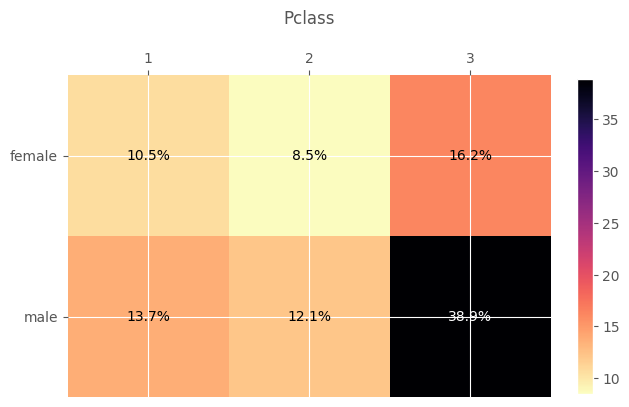

In [43]:
fig, ax = plt.subplots()

im, cbar = heatmap(result/titanic.shape[0]*100, result.index, result.columns, ax=ax,
                   cmap="magma_r", cbarlabel="")
texts = annotate_heatmap(im, size=10, valfmt="{x:.1f}%")

fig.tight_layout()
plt.show()

# Numerical Distributions

To visualize numerical distributions we use histogram plots. 

To plot histogram, the user first determine the bin size. Based on the range of the bin, the numerical data is divided into bins respectively. 


In order to maintain the area principle, the area of a histogram bar should be directly proportional to the percentage/fraction of values in that bin. 

In [44]:
data = np.array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75, 88, 24,  3, 22, 53,  2, 88,
       30, 38,  2, 64, 60, 21, 33, 76, 58, 22, 89, 49, 91])
data

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75, 88, 24,  3, 22, 53,  2, 88,
       30, 38,  2, 64, 60, 21, 33, 76, 58, 22, 89, 49, 91])

In [45]:
distribution = np.histogram(data)[0]
bins = np.histogram(data)[1]

In [46]:
bins

array([ 2. , 11.1, 20.2, 29.3, 38.4, 47.5, 56.6, 65.7, 74.8, 83.9, 93. ])

In [47]:
distribution

array([3, 1, 5, 3, 0, 3, 4, 1, 4, 6])

Let's plot this histogram

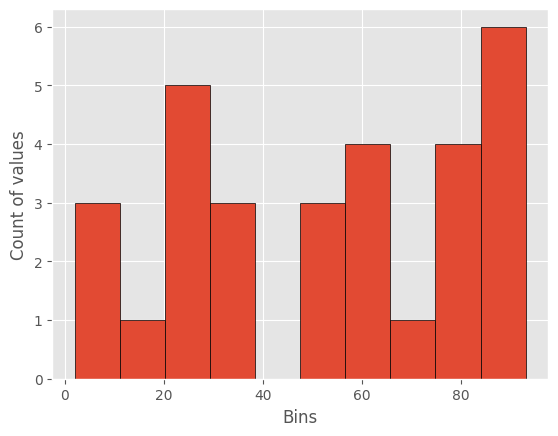

In [48]:
plt.style.use('ggplot')
plt.hist(data, bins=bins, edgecolor='black')
plt.ylabel('Count of values')
plt.xlabel('Bins')
plt.show()

Histogram plots, by default, do not maintain the area principle if the bin sizes are uneven. 

In [49]:
my_bins = np.array([0, 10, 30, 60, 100])
distribution = np.histogram(data, bins=bins)[0]
bins, distribution

(array([ 2. , 11.1, 20.2, 29.3, 38.4, 47.5, 56.6, 65.7, 74.8, 83.9, 93. ]),
 array([3, 1, 5, 3, 0, 3, 4, 1, 4, 6]))

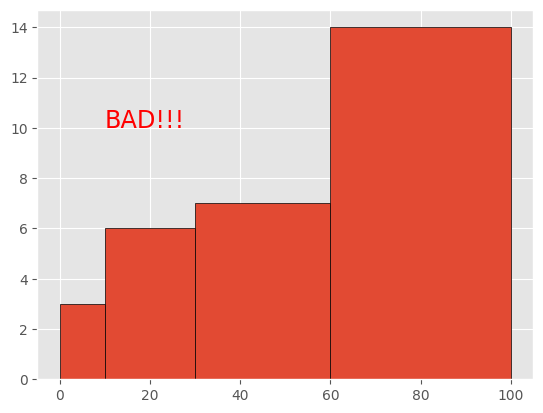

In [50]:
plt.hist(data, bins=my_bins, edgecolor='black')
plt.text(10, 10, "BAD!!!", color='red', fontsize='xx-large')
plt.show()

The plot above violates the area principle. The area of each bar is not directly proportional to the value it represents. For sake of simplicity, we will always consider the area of each bar in the histogram to be equal to the percentage of entries in that bar. 

There are total 6 entries in the bin [10, 30). Therefore, this bin holds $6/30*100 = 20\%$ of the data.  However, the area of the bin is $20 * 6 = 120$. The percentage of the entries in the bar is NOT equal to the area of the bar. Therefore, this violates the area principle. 

Let's calculate what should be the proper height of this bar, such that, it is in accordance to the area principle. 

We know that, By area principle, 
$$\text{Area of the bar} = \text{\% of entries in the bar} $$ 
$$\text{Height of bar * Width of bar} = \text{\% of entries in the bar} $$
$$\text{Height of bar} = \frac{\text{\% of entries in the bar}}{\text{Width of bar}}$$
$$ \text{Height of bar [10, 30)}= \frac{20\%}{20} = 1 \text{\% per bin}$$

In matplotlib, we can plot histogram while maintaining the area principle by setting the `density=True` parameter

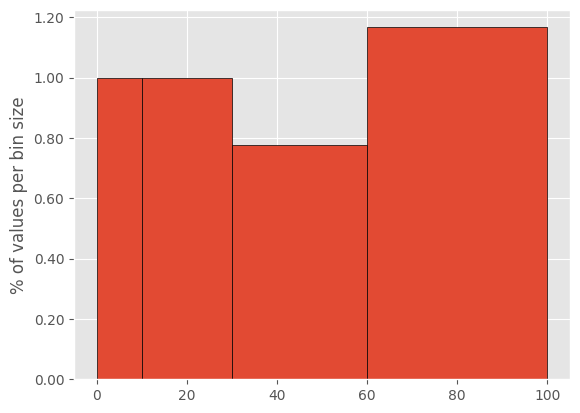

In [51]:
from matplotlib.ticker import PercentFormatter
plt.hist(data, bins=my_bins, density=True, edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0, symbol=''))
plt.ylabel("% of values per bin size")
plt.show()

### Histogram plot with different bin size

As you increase the number of bins, the width of bar will decrease, as a result, you will see lots of bars in the histogram plot. Similarly, as you decrease the number of bins, then the bars gets wider. 

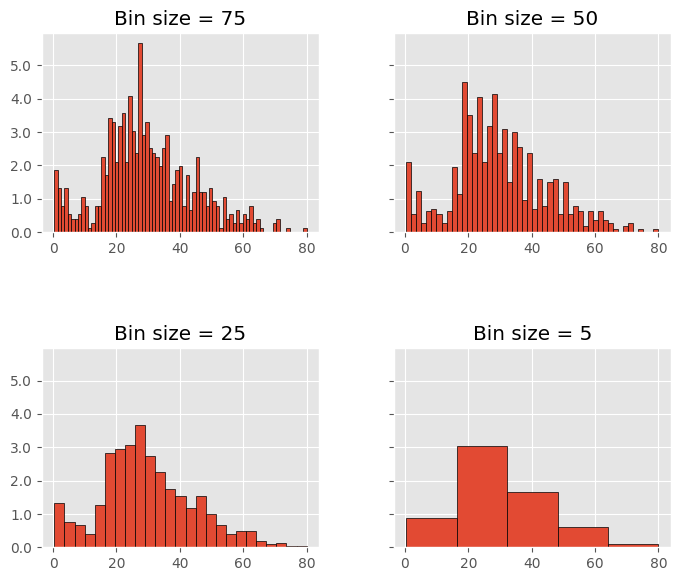

In [52]:
fig, axs = plt.subplots(2, 2,figsize=(8, 7), sharey=True)
bins = np.array([75, 50, 25, 5])

i = 0
for row in axs:
    for ax in row:
        ax.hist(titanic['Age'], bins = bins[i], edgecolor='black', density=True)
        ax.set_title(f"Bin size = {bins[i]}")
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, symbol=''))
        i+=1

fig.tight_layout(pad=5.0)

plt.show()

#### Visualizing the titanic dataset 

In [53]:
male = titanic.query('Sex == "male"')
female = titanic.query('Sex == "female"')

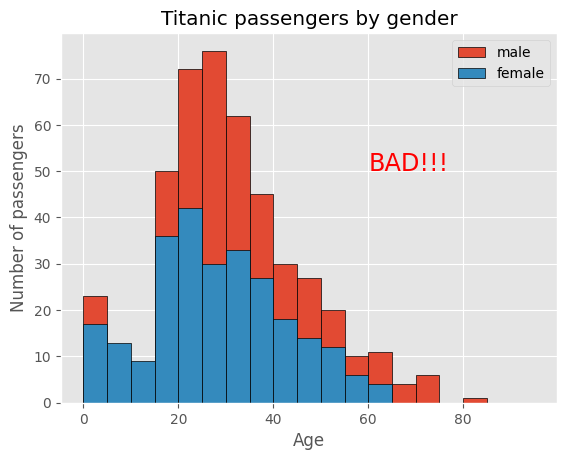

In [54]:
my_bins = np.arange(0, 100, 5)
plt.hist(male['Age'], bins = my_bins, edgecolor='black', label='male')
plt.hist(female['Age'], bins = my_bins, edgecolor='black', label='female')
plt.text(60, 50, "BAD!!!", color='red', fontsize='xx-large')
plt.ylabel("Number of passengers")
plt.xlabel("Age")
plt.title("Titanic passengers by gender")
plt.legend()
plt.show()

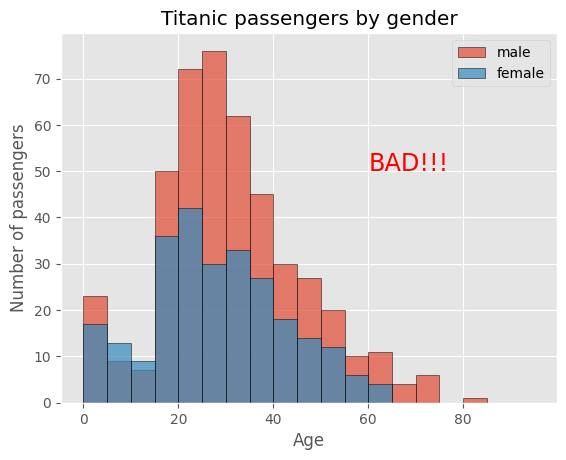

In [55]:
my_bins = np.arange(0, 100, 5)
plt.hist(male['Age'], bins = my_bins, edgecolor='black', label='male', alpha=0.7)
plt.hist(female['Age'], bins = my_bins, edgecolor='black', label='female', alpha=0.7)
plt.text(60, 50, "BAD!!!", color='red', fontsize='xx-large')
plt.ylabel("Number of passengers")
plt.xlabel("Age")
plt.title("Titanic passengers by gender")
plt.legend()
plt.show()

### Density Plot

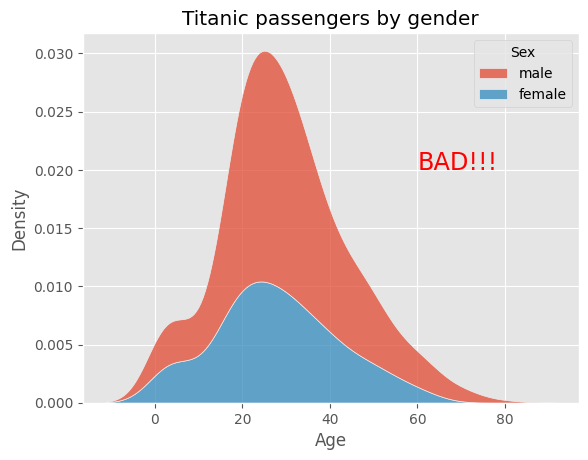

In [56]:
sns.kdeplot(data=titanic, x="Age", hue="Sex", multiple="stack")
plt.text(60, 0.020, "BAD!!!", color='red', fontsize='xx-large')
plt.ylabel("Density")
plt.xlabel("Age")
plt.title("Titanic passengers by gender")
plt.show()

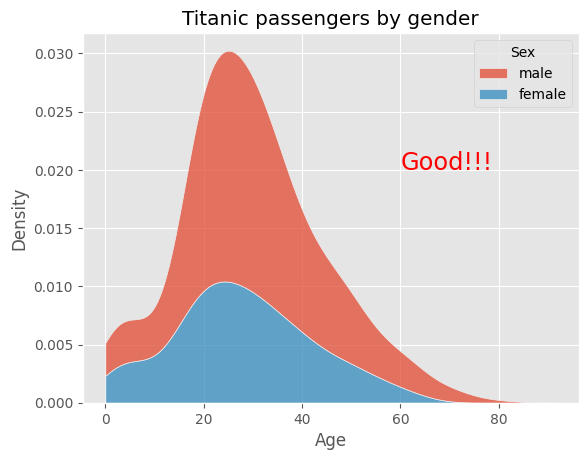

In [57]:
sns.kdeplot(data=titanic, x="Age", hue="Sex", multiple="stack",  clip=(0.0, 100.0))
plt.text(60, 0.020, "Good!!!", color='red', fontsize='xx-large')
plt.ylabel("Density")
plt.xlabel("Age")
plt.title("Titanic passengers by gender")
plt.show()